In [421]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from folium.plugins import TimeSliderChoropleth
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pycirclize import Circos
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data


In [422]:
# Leggo il file di shapes
comuni_shape = gpd.read_file('shapes/Com01012021_g_WGS84.shp',encoding='utf-8')[['COMUNE','geometry']]

# E quello dei tempi
df = pd.read_csv('datasetGenerator/output/routes.csv')
df

,fromPlaceName,fromPalceCord,toPlaceName,toPlaceCord,date,time,available,duration,startTime,endTime,...,walkDistance,walkLimitExceeded,generalizedCost,elevationLost,elevationGained,transfers,fare,url_to_watch,ResponseData,rawOutput
0,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,1:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
1,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,2:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
2,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,3:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
3,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,4:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
4,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,5:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,Lucca,"43.84281,10.50238",Pescaglia,"43.9649472,10.41305245",05-07-2023,8:00am,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '05-07-2023', '...",NaN
36476,Lucca,"43.84281,10.50238",Pescaglia,"43.9649472,10.41305245",05-07-2023,9:00am,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '05-07-2023', '...",NaN
36477,Lucca,"43.84281,10.50238",Pescaglia,"43.9649472,10.41305245",05-07-2023,10:00am,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '05-07-2023', '...",NaN
36478,Lucca,"43.84281,10.50238",Pescaglia,"43.9649472,10.41305245",05-07-2023,11:00am,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '05-07-2023', '...",NaN


In [423]:
    # Creare una lista di corrispondenze tra coordinate originali e nuove coordinate per visualizzare meglio i luoghi nella mappa
    coordinate_corrispondenti = {
        '44.15955695,10.3330076': '44.142970, 10.284879',
        '44.11944175,10.3256665': '44.070344, 10.271496',
        '44.11419535,10.4024762': '44.111119, 10.349057',
        '44.1517665,10.41126715': '44.193861, 10.457594',
        '43.99803285,10.42961115': '44.028249,10.357202',
        '44.11533145,10.45835555': '44.11533145,10.45835555',
        '44.06049345,10.4397426': '44.042430,10.403044',
        '44.1696951,10.20750045': '44.170701, 10.194653',
        '44.07211555,10.4178267': '44.064844, 10.356425',
        '44.1846216,10.2940049': '44.198271,10.275178',
        '44.14504415,10.44694585': '44.163176, 10.463618',
        '44.1703812,10.34601445': '44.170458, 10.336809',
        '44.2231432,10.300024': '44.260825, 10.304469',
        '44.15904725,10.39775715': '44.211397, 10.359798',
        '44.0089207,10.5743811': '44.047566, 10.619478',
        '44.07326495,10.4775162': '44.134131, 10.519054',
        '43.98057185,10.54311025': '43.981896, 10.503671',
        '44.0692364,10.5599585': '44.080237, 10.531010',
        '43.9649472,10.41305245': '43.960215,10.388775',
        '43.84281,10.50238': '43.84281,10.50238',
    }

In [424]:
def plotDataset(df_routes, df_shapes, city, date, time):

    df_routes = df_routes[(df_routes['fromPlaceName'] == city) & (df_routes['date'] == date) & (df_routes['time'] == time)]
    df_routes.drop(columns=['walkDistance','walkLimitExceeded','generalizedCost','elevationLost','elevationGained','transfers','fare','url_to_watch','ResponseData','rawOutput','startTime','endTime', 'available','walkTime'], inplace=True)
    df_routes['duration'] = df_routes['duration'].replace(np.nan, 99998)
    df_routes['duration'] = df_routes['duration'].astype(int)
    intervalli = [0, 1800, 3600, 10800, 99999]
    colori = ['#8ceb34', '#ebc334', '#eb3a34', '#7a7a79']
    df_routes['colore'] = pd.cut(df_routes['duration'], bins=intervalli, labels=colori)
    df = df_shapes.merge(df_routes, left_on="COMUNE", right_on="toPlaceName", how="inner")
    gdf_nuts_geom = gpd.GeoDataFrame(df, geometry='geometry')
    gdf_nuts_geom.dropna(inplace=True)

    m = folium.Map((44.096563, 10.418314), zoom_start=10.4, width=600, height=600)

    folium.GeoJson(
        gdf_nuts_geom,
        style_function=lambda feature: {
            'fillColor': feature['properties']['colore'],
            'color': feature['properties']['colore'],
            'weight': 0.7,
            'fillOpacity': 0.5,
        },
        tooltip=folium.GeoJsonTooltip(
            fields=['COMUNE', 'duration', 'fromPlaceName'],
            aliases=['COMUNE', 'duration', 'fromPlaceName'],
            localize=True
        )
    ).add_to(m)

    # Iterare sul DataFrame
    for index, row in df.iterrows():
        coordinate_string = row['toPlaceCord']
        
        # Sostituire la coordinata con la corrispondente dalla lista
        coordinate_list = [float(coord) for coord in coordinate_corrispondenti.get(coordinate_string, '').split(',')]

        testo_etichetta = row['toPlaceName']

        # Aggiungi un'etichetta personalizzata sopra l'area geografica
        folium.Marker(
            location=coordinate_list,
            icon=folium.DivIcon(
                icon_size=(150, 36),
                icon_anchor=(7, 20),
                html=f'<div style="font-size: 7pt; color: black; width: 48%; margin: 10px;"><b>{testo_etichetta}</b></div>'
            )
        ).add_to(m)


    coordinate_string = df.loc[0, 'fromPalceCord']
    coordinate_list = [float(coord) for coord in coordinate_string.split(',')]
    folium.Marker(
        location=coordinate_list,
        popup="Punto di partenza",
    ).add_to(m)

    # Crea la legenda con intervalli di tempo
    legend_html = '''
         <div style="position: fixed; 
                     bottom: 50px; left: 50px; padding: 10px;
                     border:2px solid grey; z-index:9999; font-size:10px;
                     background-color:white; opacity:0.85;">
         &nbsp; <b>Legenda</b> <br>
         '''
    intervalli = ['0', '30 min', '1 ora', '3 ore', 'Non disponibili']
    for i, intervallo in enumerate(zip(intervalli[:-1], intervalli[1:])):
        legend_html += f'&nbsp; <span style="display:inline-block; width:10px; height:10px; background:{colori[i]};"></span> {intervallo[0]} - {intervallo[1]}<br>'
        if i == len(colori) - 2:
            break
    legend_html += f'&nbsp; <span style="display:inline-block; width:10px; height:10px; background:#7a7a79;"></span> Non disponibile<br>'

    legend_html += '''
         </div>
         '''

    m.get_root().html.add_child(folium.Element(legend_html))

    return m




In [425]:
plotDataset(df, comuni_shape, 'Lucca', '10-01-2023', '8:00pm')

/tmp/ipykernel_5377/4232303219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_routes.drop(columns=['walkDistance','walkLimitExceeded','generalizedCost','elevationLost','elevationGained','transfers','fare','url_to_watch','ResponseData','rawOutput','startTime','endTime', 'available','walkTime'], inplace=True)
/tmp/ipykernel_5377/4232303219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_routes['duration'] = df_routes['duration'].replace(np.nan, 99998)
/tmp/ipykernel_5377/4232303219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [426]:
def choordDiagram(df, date=None, time=None):
    if date is not None:
        df = df[df['date'] == date]
    if time is not None:
        df = df[df['time'] == time]
    df = df[df['available'] == True]
    df.drop(columns=['walkDistance','available','duration','fromPalceCord','toPlaceCord','walkLimitExceeded','generalizedCost','elevationLost','elevationGained','transfers','fare','url_to_watch','ResponseData','rawOutput','startTime','endTime', 'walkTime'], inplace=True)
    df = df.groupby(['fromPlaceName', 'toPlaceName']).size().reset_index(name='count')
    df = df.pivot(index='fromPlaceName', columns='toPlaceName', values='count')
    # Sostituire i NaN con zero
    df = df.fillna(0)

    ######################################
    ######################################

    col_names = list(df.columns)

    # Estrarre i nomi delle righe
    row_names = list(df.index)

    # Estrarre i dati della matrice
    matrix_data = df.values.tolist()
    matrix_df = pd.DataFrame(matrix_data, index=row_names, columns=col_names)

    # Initialize from matrix (Can also directly load tsv matrix file)
    circos = Circos.initialize_from_matrix(
        matrix_df,
        start=-265,
        end=95,
        space=5,
        r_lim=(93, 100),
        cmap="tab10",
        label_kws=dict(r=94, size=12, color="white"),
        link_kws=dict(ec="black", lw=0.5),
    )

    #print(matrix_df)
    fig = circos.plotfig()

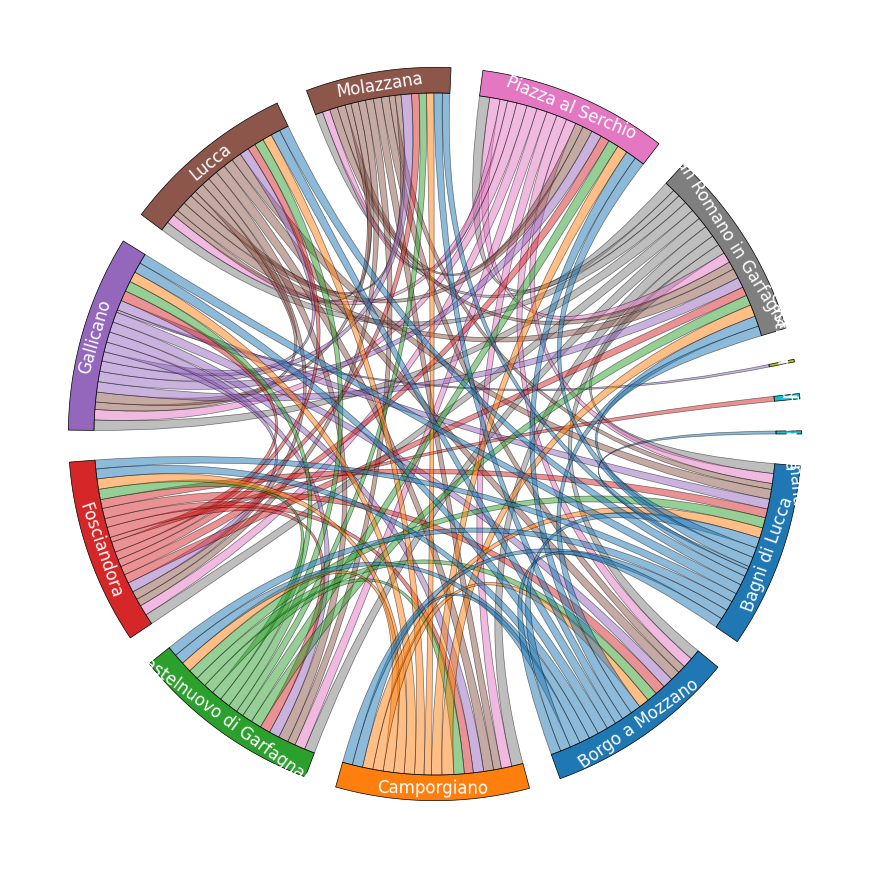

In [427]:
# https://moshi4.github.io/pyCirclize/chord_diagram/


# Data e orario sono parametri opzionali
choordDiagram(df, '10-01-2023')

In [428]:

from bokeh.layouts import row
from bokeh.io import push_notebook, show, output_notebook


def choordDiagramAlternative(df, date=None, time=None):
    if date is not None:
        df = df[df['date'] == date]
    if time is not None:
        df = df[df['time'] == time]
    df = df[df['available'] == True]
    df.drop(columns=['walkDistance','available','duration','fromPalceCord','toPlaceCord','walkLimitExceeded','generalizedCost','elevationLost','elevationGained','transfers','fare','url_to_watch','ResponseData','rawOutput','startTime','endTime', 'walkTime'], inplace=True)
    df = df.groupby(['fromPlaceName', 'toPlaceName']).size().reset_index(name='count')
    #df = df.pivot(index='fromPlaceName', columns='toPlaceName', values='count')
    # Sostituire i NaN con zero
    df = df.fillna(0)

    ######################################
    ######################################

    df.rename(columns={'fromPlaceName': 'source', 'toPlaceName': 'target', 'count': 'value'}, inplace=True)
    # Convert the DataFrame to a Dataset
    ds = hv.Dataset(df, kdims=['source', 'target'], vdims=['value'])

    # Create the chord diagram
    chord = hv.Chord(ds)

    # Set the chord diagram options
    chord.opts(opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), labels='name', node_color=dim('index').str()))

    # Render the chord diagram
    show(hv.render(chord))


In [429]:
choordDiagramAlternative(df, '10-01-2023')